In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see there is 18 object datatype present in our data set so we will treat them further.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value present in our data set.

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

CustomerID has only unique value so we will drop the CustomerID 

In [7]:
df.drop('customerID',axis=1,inplace=True)

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.shape

(7021, 20)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [11]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

Which means 5164 customer has retained & 1857 customer has churned.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now we have to check data through Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

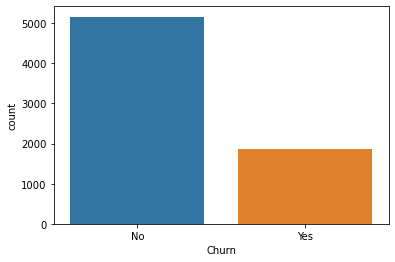

In [13]:
sns.countplot(df['Churn'],)

<AxesSubplot:xlabel='gender', ylabel='count'>

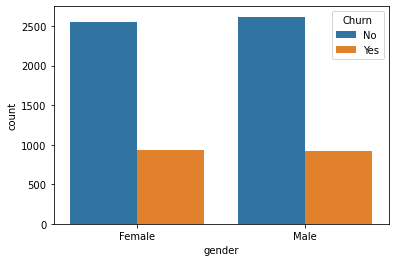

In [14]:
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

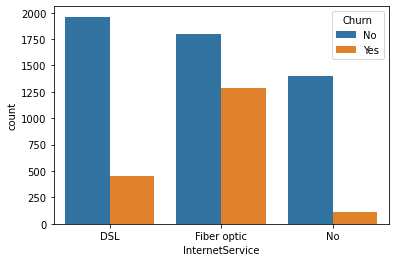

In [15]:
sns.countplot(x='InternetService',hue='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='count'>

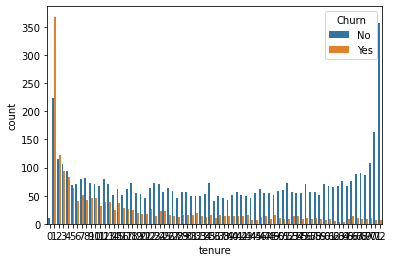

In [16]:
sns.countplot(x='tenure',hue='Churn',data=df)

Now we have to do data processing & cleaning

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
cleaned_df=df

In [21]:
cleaned_df.shape

(7021, 20)

In [22]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtype==np.number:
        continue
    cleaned_df[column]=le.fit_transform(cleaned_df[column])

In [23]:
cleaned_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [24]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [25]:
cleaned_df.shape

(7021, 20)

In [26]:
x=cleaned_df.drop('Churn',axis=1)
y=cleaned_df.Churn

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
x=scaler.fit_transform(x)

In [30]:
x

array([[-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.16413536, -0.39921533],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.26281076, -0.94926733],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.36591432, -1.64225874],
       ...,
       [-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.17245016, -0.14033619],
       [ 0.9913492 ,  2.27010445,  1.03140002, ...,  1.33896466,
         0.31756245, -0.31715752],
       [ 0.9913492 , -0.44050836, -0.96955592, ..., -1.47146012,
         1.35691277,  1.13711856]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=60)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log=LogisticRegression()

In [35]:
log.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred=log.predict(x_test)

In [37]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1188
           1       0.70      0.54      0.61       498

    accuracy                           0.80      1686
   macro avg       0.76      0.72      0.73      1686
weighted avg       0.79      0.80      0.79      1686

